<a href="https://colab.research.google.com/github/cristinarainich/DDCS/blob/main/Results_presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import math
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
sns.set()

In [4]:
# put everything in a separate folder
working_path = Path('/content/drive/MyDrive/KKNV/data/tv')

In [5]:
cd /content/drive/MyDrive/KKNV/data/tv

/content/drive/MyDrive/KKNV/data/tv


In [6]:
!ls /content/drive/MyDrive/KKNV/data/tv

 Erik_sham.log				      'Temporal_Frequency_Final 13-00 17-Apr-2024'
 Erik_stimulation.log			      'Temporal_Frequency_Final 13-06 17-Apr-2024'
 Kristin_sham.log			      'Temporal_Frequency_Final 13-10 17-Apr-2024'
 Kristin_stimulation.log		      'Temporal_Frequency_Final 13-14 17-Apr-2024'
'Temporal_Frequency_Final 12-59 17-Apr-2024'


In [165]:
def create_plots(data, plot, title):
  bar_width = 0.35
  positions = list(range(len(data['Subject'].unique()) * 2)) # Twice the number of subjects for two sessions
  # Create subplots
  fig, ax = plt.subplots(figsize=(4, 4))

  pastel_blue = '#AEC6CF'
  pastel_orange = '#FFB347'

  #session 1 = stimulation, session 2 = sham

  subjects = data['Subject'].unique()
  for i, subject in enumerate(subjects):
      session1_value = data[(data['Subject'] == subject) & (data['Session'] == 1)][plot].mean()
      session2_value = data[(data['Subject'] == subject) & (data['Session'] == 2)][plot].mean()

    # Plotting session values with different colors for different sessions
      ax.bar(i * 2 - bar_width/2, session1_value, bar_width, alpha=0.7, label=f'Stimulation' if i == 0 else "", color=pastel_blue)
      ax.bar(i * 2 + bar_width/2, session2_value, bar_width, alpha=0.7, label=f'Sham' if i == 0 else "", color=pastel_orange)

# Setting the y-axis label and the title
  ax.set_ylabel(plot)
  ax.set_title(title)

# Setting the position of the x ticks
  ax.set_xticks([i * 2 for i in range(len(subjects))])
  ax.set_xticklabels(subjects)

# Adding the legend and showing the plot
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.show()

## RAN results



In [31]:
# PUT THE VALUES BELOW
# Group, session, RANletters Acc 1, RANletters Acc 2, RANletters RT 1, RANletters RT 2
# RANnumbers Acc 1, RANnumbers Acc 2, RANnumbers RT 1, RANnumbers RT 2
raw1 = ['Erik', 1, 0, 0, 18, 17, 1, 0, 15, 13] # stimulation
raw2 = ['Erik', 2, 0, 0, 21, 20, 0, 0, 17, 18] # sham
raw3 = ['Kristin', 1, 1, 1, 21, 25, 2, 0, 22, 21] # stimulation
raw4 = ['Kristin', 2, 2, 1, 19, 18, 2, 0, 21, 19] # sham

rows = []
rows.append(raw1)
rows.append(raw2)
rows.append(raw3)
rows.append(raw4)
column_names = ['Subject', 'Session', 'RANL ACC 1', 'RANL ACC 2', 'RANL RT 1', 'RANL RT 2', 'RANN ACC 1', 'RANN ACC 2', 'RANN RT 1', 'RANN RT 2']

In [32]:
df = pd.DataFrame(rows, columns=column_names)

In [33]:
df['AccL'] = 100 - df[['RANL ACC 1', 'RANL ACC 2']].mean(axis=1) * 100/50
df['AccN'] = 100 - df[['RANN ACC 1', 'RANN ACC 2']].mean(axis=1) * 100/50
df['RT L'] = df[['RANL RT 1', 'RANL RT 2']].mean(axis=1)
df['RT N'] = df[['RANN RT 1', 'RANN RT 1']].mean(axis=1)

In [34]:
df['Genauigkeit'] = df[['AccL', 'AccN']].mean(axis=1)
df['Reaktionszeit'] = df[['RT L', 'RT N']].mean(axis=1)

In [35]:
df

,Subject,Session,RANL ACC 1,RANL ACC 2,RANL RT 1,RANL RT 2,RANN ACC 1,RANN ACC 2,RANN RT 1,RANN RT 2,AccL,AccN,RT L,RT N,Genauigkeit,Reaktionszeit
0,Erik,1,0,0,18,17,1,0,15,13,100.0,99.0,17.5,15.0,99.5,16.25
1,Erik,2,0,0,21,20,0,0,17,18,100.0,100.0,20.5,17.0,100.0,18.75
2,Kristin,1,1,1,21,25,2,0,22,21,98.0,98.0,23.0,22.0,98.0,22.50
3,Kristin,2,2,1,19,18,2,0,21,19,97.0,98.0,18.5,21.0,97.5,19.75


In [27]:
df[['Subject', 'Session', 'AccL', 'AccN', 'RT L', 'RT N', 'Acc', 'RT']]

,Subject,Session,AccL,AccN,RT L,RT N,Acc,RT
0,Erik,1,100.0,99.0,17.5,15.0,99.5,16.25
1,Erik,2,100.0,100.0,20.5,17.0,100.0,18.75
2,Kristin,1,98.0,98.0,23.0,22.0,98.0,22.50
3,Kristin,2,97.0,98.0,18.5,21.0,97.5,19.75


KeyError: 'Genauigkeit'

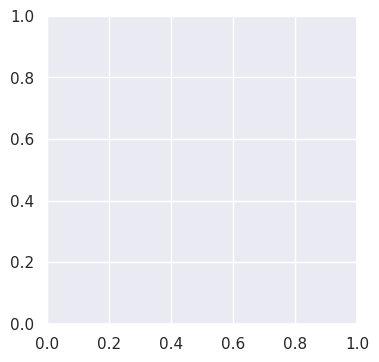

In [166]:
create_plots(df, 'Genauigkeit', 'Genauigkeit bei RAN-Buchstaben und -Zahlen (in %)')
create_plots(df, 'Reaktionszeit', 'Reaktionszeit bei RAN-Buchstaben und -Zahlen (in sec)')

## Spoonerism

For spoonerism, we have 20 trials with a slide of instruction in between. instruction slides - 10 with nouns - instrcution - 10 with verbs - end slide

In [68]:
# change the names of the files according to the format
# "Erik_stimulation.log", "Erik_sham.log"
# "Kristin_stimulation.log", "Kristin_sham.log"
file_names = [
    "Erik_stimulation.log", "Erik_sham.log",
    "Kristin_stimulation.log", "Kristin_sham.log"
]

In [107]:
# for reaction time
# session 1 = stimulation, session 2 = sham
all_data = pd.DataFrame()
for name in file_names:
  data = pd.read_csv(
        working_path.joinpath(name),
        delimiter='\t', skiprows=1, encoding='utf-8', on_bad_lines='skip')
  df = data.reset_index()
  df.columns = df.iloc[0]
  df = df.drop(0)
  df = df[['Subject', 'Trial', 'Time', 'TTime']]
  df = df.drop([1, 2, 3, 4, 5, 6, 7, 18, 29, 30], axis = 0) # recheck in the task!!!!
  if 'stimulation' in name:
    df['Session'] = 1
  elif 'sham' in name:
    df['Session'] = 2
  all_data = pd.concat([all_data, df])

In [126]:
all_data = all_data.rename({'TTime':'Reaktionszeit'}, axis=1)
all_data['Reaktionszeit'] = all_data['Reaktionszeit'].astype(int)

In [109]:
# simulation
subject1 = ['Erik'] * 40
subject2 = ['Kristin'] * 40
subject = subject1 + subject2

In [110]:
all_data['Subject'] = subject

In [161]:
# adding the accuracy results in the spoonerism task
erik_stim = [1] * 20
erik_sham = [1] * 20
kris_stim = [1] * 19 + [0]
kris_sham = [1] * 18 + [0] * 2
accuracy = erik_stim + erik_sham + kris_stim + kris_sham # exactly in this order

In [162]:
all_data['Genauigkeit'] = accuracy

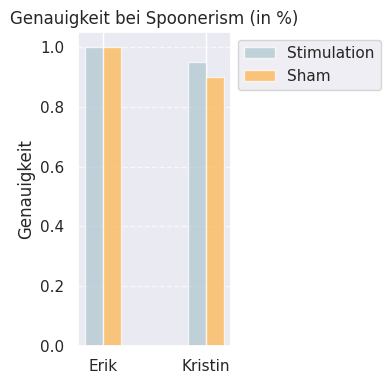

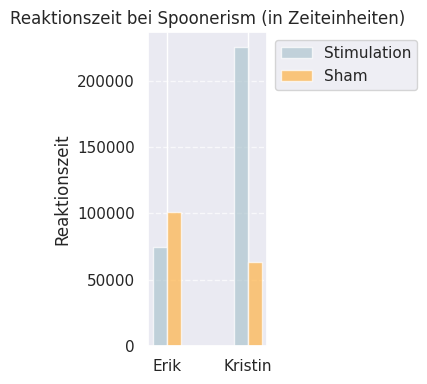

In [167]:
create_plots(all_data, 'Genauigkeit', 'Genauigkeit bei Spoonerism (in %)')
create_plots(all_data, 'Reaktionszeit', 'Reaktionszeit bei Spoonerism (in Zeiteinheiten)')

## Motion perception

We usually have 3-4 or more files for motion perception because we restarting it several times. The first short one is always practice. One could ignore it.

In [38]:
!ls /content/drive/MyDrive/KKNV/data/tv/motion4

 BaseReport.csv		  StaircasePlot.png	 StaircaseValuesR.csv
'StaircasePlot (1).png'   StaircaseValuesL.csv	 TrackerLog.csv


We have three files that one might use: base report, staircase left and right. We can build staircases for two hemifields.

In [31]:
working_path = Path('/content/drive/MyDrive/KKNV/data/tv/motion4/')

In [90]:
def inspect_file(file_path, num_lines=20):
    with open(file_path, 'r', encoding='utf-8') as f:
        for i in range(num_lines):
            print(f"{i}: {f.readline()}")

In [91]:
# Inspect the first few lines of the file
file_path = working_path.joinpath('StaircaseValuesR.csv')
inspect_file(file_path)

0: Enforced correct rate,Initial intensity,Staircase step,Inverse staircase step,Minimum Reversal Number,Ignorable reversal number,Collected staircase points,Collected reversals,Estimated threshold ,Threshold SE,Threshold SD,Actual correct rate,Is staircase completed

1: 80,1,-0.02,0.08,13,5,39,13,1.895,0.0280226311602401,0.224181049281921,47.3684210526316,1

2: 

3: Reversal List

4: 0.96,1.12,1.04,1.6,1.56,1.64,1.6,1.84,1.76,2,1.96,2.2,2.16

5: 

6: Response,Staircase Points

7: 1,1

8: 1,0.98

9: 0,0.96

10: 0,1.04

11: 1,1.12

12: 1,1.1

13: 1,1.08

14: 1,1.06

15: 0,1.04

16: 0,1.12

17: 0,1.2

18: 0,1.28

19: 0,1.36



In [49]:
# reading base report file
def read_basereport_file(file_path, data_start_row, delimiter=','):
    try:
        # Read the CSV file starting from the actual data row, with the correct delimiter
        data = pd.read_csv(file_path, delimiter=delimiter, skiprows=data_start_row, on_bad_lines='skip')
        return data
    except pd.errors.ParserError as pe:
        print(f"Parser error: {pe}")
        return None
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None

# Example usage
data_start_row = 7  # Adjust this value based on where your actual data starts (0-based index)
delimiter = ','  # Adjust the delimiter if necessary
basereport = read_basereport_file(working_path.joinpath('BaseReport.csv'), data_start_row, delimiter)

In [51]:
# working on base report
# maybe correct tril is when it is True in the "Is Triggered Correct ROI"
basereport.drop(['Speed Increase', 'TFIncrease', 'Block Number'], axis='columns', inplace=True)

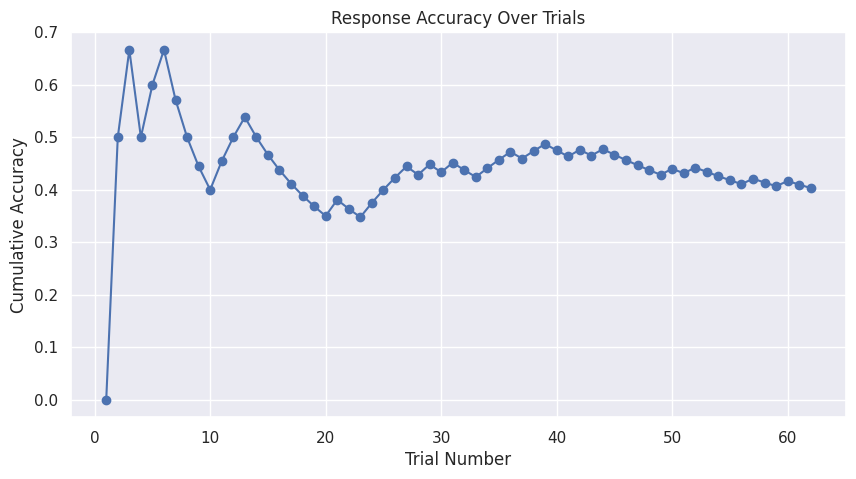

In [69]:
 # building a plot on accuracy over trials
responses = basereport['Is Triggered Correct ROI'].values  #False for incorrect, True for correct
trials = basereport['Total Trial Number'].values
resp = []
for response in responses:
  if response == True:
    resp.append(1)
  elif response == False:
    resp.append(0)
  else:
    print(response)
    break

accuracy = np.cumsum(resp) / np.arange(1, 63)
plt.figure(figsize=(10, 5))
plt.plot(trials, accuracy, marker='o', linestyle='-')
plt.xlabel('Trial Number')
plt.ylabel('Cumulative Accuracy')
plt.title('Response Accuracy Over Trials')
plt.grid(True)
plt.show()

In [105]:
def read_staircase(file_path):
    # Initialize dictionaries to store different sections
    metadata = {}
    reversal_list = []
    response_data = None

    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()

    # Extract metadata
    metadata_row = lines[0].strip().split(',')
    metadata_values = lines[1].strip().split(',')
    metadata = dict(zip(metadata_row, metadata_values))

    # Find the start indices for each section
    reversal_start_idx = lines.index('Reversal List\n') + 1
    response_start_idx = lines.index('Response,Staircase Points\n') + 1

    # Extract reversal list
    for line in lines[reversal_start_idx:response_start_idx - 2]:
        reversal_list.extend(line.strip().split(','))

    # Extract response data
    response_data = pd.read_csv(file_path, delimiter=',', skiprows=response_start_idx - 1)

    return metadata, reversal_list, response_data

metadata_right, reversal_right, response_right = read_staircase(
    working_path.joinpath('StaircaseValuesR.csv')
    )
metadata_left, reversal_left, response_left = read_staircase(
    working_path.joinpath('StaircaseValuesL.csv')
    )

In [117]:
for i in range(len(reversal_right)):
  reversal_right[i] = float(reversal_right[i])
for i in range(len(reversal_left)):
  reversal_left[i] = float(reversal_left[i])

In [115]:
reversal_right

[0.96, 1.12, 1.04, 1.6, 1.56, 1.64, 1.6, 1.84, 1.76, 2.0, 1.96, 2.2, 2.16]

In [112]:
metadata_right

{'Enforced correct rate': '80',
 'Initial intensity': '1',
 'Staircase step': '-0.02',
 'Inverse staircase step': '0.08',
 'Minimum Reversal Number': '13',
 'Ignorable reversal number': '5',
 'Collected staircase points': '39',
 'Collected reversals': '13',
 'Estimated threshold ': '1.895',
 'Threshold SE': '0.0280226311602401',
 'Threshold SD': '0.224181049281921',
 'Actual correct rate': '47.3684210526316',
 'Is staircase completed': '1'}

In [124]:
reversal_right

[0.96, 1.12, 1.04, 1.36, 1.32, 1.4, 1.26, 1.34, 1.3, 1.38, 1.32, 1.48, 1.44]

In [145]:
metadata_left

{'Enforced correct rate': '80',
 'Initial intensity': '1',
 'Staircase step': '-0.02',
 'Inverse staircase step': '0.08',
 'Minimum Reversal Number': '13',
 'Ignorable reversal number': '5',
 'Collected staircase points': '51',
 'Collected reversals': '19',
 'Estimated threshold ': '1.49428571428571',
 'Threshold SE': '0.014001890110452',
 'Threshold SD': '0.196026461546327',
 'Actual correct rate': '60',
 'Is staircase completed': '1'}

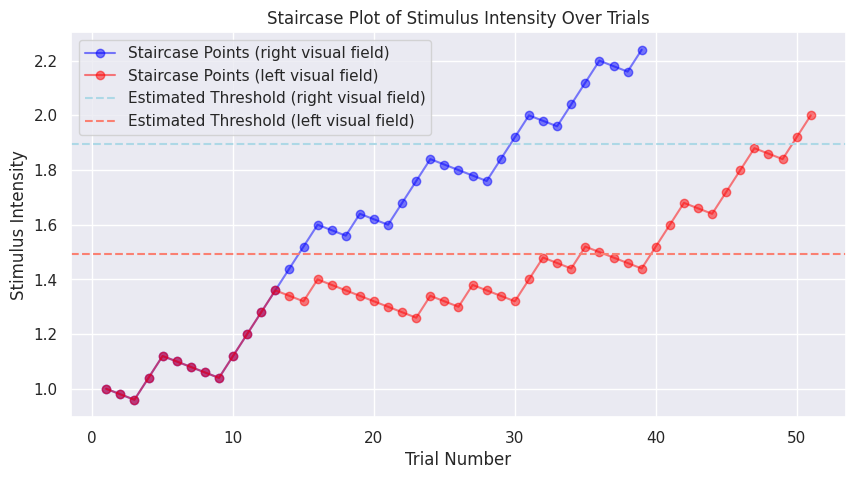

In [149]:
trial_numbers_right = list(range(1, len(response_right['Staircase Points'].values) + 1))
trial_numbers_left = list(range(1, len(response_left['Staircase Points'].values) + 1))

# Plot staircase points as intensities
plt.figure(figsize=(10, 5))
plt.plot(trial_numbers_right, response_right['Staircase Points'].values, marker='o', linestyle='-', color='blue',
         alpha=0.5,
         label='Staircase Points (right visual field)')
plt.plot(trial_numbers_left, response_left['Staircase Points'].values, marker='o', linestyle='-', color='red',
         alpha=0.5, label='Staircase Points (left visual field)')

plt.axhline(y=float(metadata_right['Estimated threshold ']), color='lightblue', linestyle='--', label='Estimated Threshold (right visual field)')
plt.axhline(y=float(metadata_left['Estimated threshold ']), color='salmon', linestyle='--', label='Estimated Threshold (left visual field)')

# Label axes and add title
plt.xlabel('Trial Number')
plt.ylabel('Stimulus Intensity')
plt.title('Staircase Plot of Stimulus Intensity Over Trials')
plt.legend()

# Show plot
plt.grid(True)
plt.show()